
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>

---
---
  
# Análisis Estadístico de Datos - 2023

* **Profesor**: Diego Ravignani Guerrero
* **Prácticas**: Carmina Pérez Bertolli



---
---
## Trabajo Práctico 4 - Estimación de Parámetros
---
---

Simular una muestra de dos variables aleatorias $X_1$ y $X_2$ que siguen una distribución normal estándar. Calcular la varianza muestral $s^2$. Considerar dos estimadores diferentes de la desviación estándar $t_1 = \sqrt{s^2}$ y $t_2 = \sqrt{\pi s^2/2}$. Repetir la simulación 1000 veces y construir los histogramas de frecuencia de $t_1$ y $t_2$. Decidir si los estimadores $t_1$ y $t_2$ son sesgados o no. Discutir porque el estimador de varianza $s^2$ no tiene sesgo pero el estimador de la desviación estándar $t_1 = \sqrt(s^2)$ es sesgado.


---
### **Resolución**

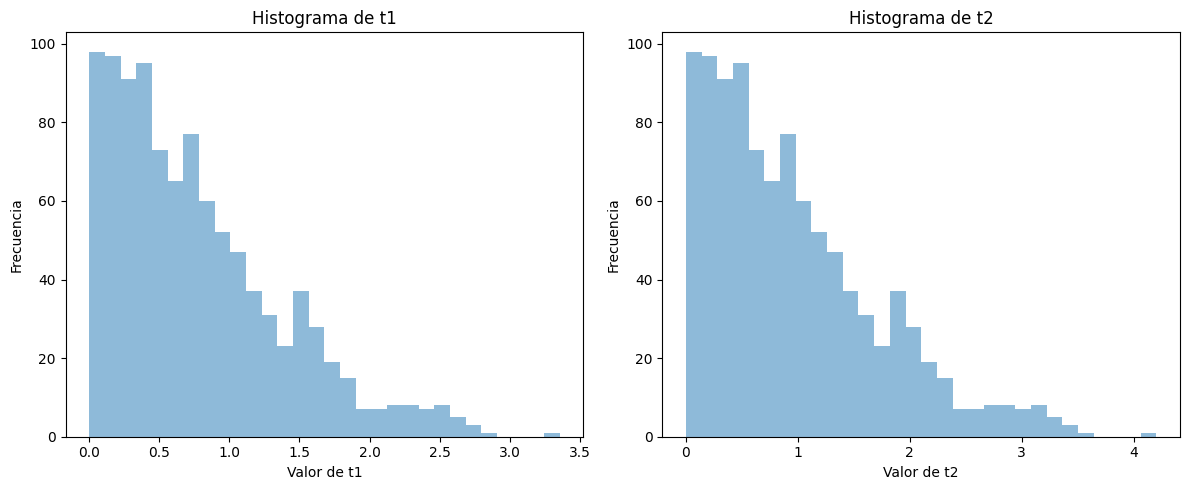

Sesgo de t1: -0.22541777213098535
Sesgo de t2: -0.029205143298427605
El estimador de varianza s^2 no tiene sesgo, ya que es un estimador no sesgado de la varianza poblacional. Sin embargo, al tomar la raíz cuadrada para obtener t1, se introduce sesgo debido a la no linealidad de la función de raíz cuadrada. Por otro lado, t2 también introduce sesgo debido a la no linealidad y al factor pi en la fórmula.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # Para reproducibilidad
n = 1000  # Número de simulaciones
sample_size = 2  # Tamaño de la muestra
X = np.random.randn(n, sample_size)  # Muestras de X1 y X2

# Calcular la varianza muestral s^2
s2 = np.var(X, ddof=1, axis=1)

# Calcular los estimadores t1 y t2
t1 = np.sqrt(s2)
t2 = np.sqrt(np.pi * s2 / 2)

# Construir histogramas de t1 y t2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(t1, bins=30, alpha=0.5, label='t1')
plt.xlabel('Valor de t1')
plt.ylabel('Frecuencia')
plt.title('Histograma de t1')

plt.subplot(1, 2, 2)
plt.hist(t2, bins=30, alpha=0.5, label='t2')
plt.xlabel('Valor de t2')
plt.ylabel('Frecuencia')
plt.title('Histograma de t2')

plt.tight_layout()
plt.show()

# Calcular si los estimadores son sesgados
true_std = 1  # Desviación estándar verdadera de la distribución normal estándar

bias_t1 = np.mean(t1) - true_std
bias_t2 = np.mean(t2) - true_std

print(f"Sesgo de t1: {bias_t1}")
print(f"Sesgo de t2: {bias_t2}")

# Discutir el sesgo en t1
print("El estimador de varianza s^2 no tiene sesgo, ya que es un estimador no sesgado de la varianza poblacional. Sin embargo, al tomar la raíz cuadrada para obtener t1, se introduce sesgo debido a la no linealidad de la función de raíz cuadrada. Por otro lado, t2 también introduce sesgo debido a la no linealidad y al factor pi en la fórmula.")




### Explicación:

**Estimador de la varianza $s^2$:**

El estimador de la varianza muestral, denotado como $s^2$, se calcula de la siguiente manera:

$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2$$

Donde:

- $n$ es el tamaño de la muestra.
- $X_i$ son las observaciones individuales en la muestra.
- $\bar{X}$ es la media muestral.

La razón por la que el estimador de varianza $s^2$ no tiene sesgo es que se divide por $(n-1)$ en lugar de $n$. Esta división por $(n-1)$ se denomina "corrección de Bessel". La corrección de Bessel ajusta el estimador para que sea insesgado, lo que significa que su valor esperado (promedio teórico si realizaras un número infinito de experimentos) es igual a la varianza real de la población. En otras palabras, el estimador $s^2$ tiene un sesgo de cero.

**Estimador de la desviación estándar $t_1 = \sqrt{s^2}$:**

Cuando calculas la desviación estándar muestral $t_1$ como la raíz cuadrada de la varianza muestral $s^2$, estás aplicando una operación no lineal (la raíz cuadrada) al estimador de la varianza. Esta operación no lineal introduce sesgo. El sesgo ocurre porque la función de raíz cuadrada no es lineal en la media de sus argumentos. La propiedad de no sesgo solo se mantiene para estimadores lineales, es decir, estimadores donde la media de la estimación es igual al valor verdadero del parámetro que estás estimando.
